In [1]:
#----------------数据探索----------------
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
#数据预处理
train=pd.read_csv('比赛训练集.csv',encoding='gbk')
test=pd.read_csv('比赛测试集.csv',encoding='gbk') #label标记为-1


In [2]:
train.isnull().sum()

编号            0
性别            0
出生年份          0
体重指数          0
糖尿病家族史        0
舒张压         247
口服耐糖量测试       0
胰岛素释放实验       0
肱三头肌皮褶厚度      0
患有糖尿病标识       0
dtype: int64

In [3]:
test.isnull().sum()

编号           0
性别           0
出生年份         0
体重指数         0
糖尿病家族史       0
舒张压         49
口服耐糖量测试      0
胰岛素释放实验      0
肱三头肌皮褶厚度     0
dtype: int64

In [4]:
#查看相关性
print(train.corr())

                编号        性别      出生年份      体重指数       舒张压   口服耐糖量测试  \
编号        1.000000  0.006603 -0.006693  0.000028  0.003495 -0.005840   
性别        0.006603  1.000000 -0.119563  0.075186  0.078870  0.011463   
出生年份     -0.006693 -0.119563  1.000000 -0.074603 -0.154631  0.002085   
体重指数      0.000028  0.075186 -0.074603  1.000000  0.159903 -0.001796   
舒张压       0.003495  0.078870 -0.154631  0.159903  1.000000 -0.020317   
口服耐糖量测试  -0.005840  0.011463  0.002085 -0.001796 -0.020317  1.000000   
胰岛素释放实验   0.020441 -0.053597  0.058585 -0.034507 -0.206663  0.093715   
肱三头肌皮褶厚度  0.030330  0.014037 -0.013111  0.026321  0.076147 -0.006483   
患有糖尿病标识   0.027435  0.031480 -0.068225  0.377919  0.157421  0.178133   

           胰岛素释放实验  肱三头肌皮褶厚度   患有糖尿病标识  
编号        0.020441  0.030330  0.027435  
性别       -0.053597  0.014037  0.031480  
出生年份      0.058585 -0.013111 -0.068225  
体重指数     -0.034507  0.026321  0.377919  
舒张压      -0.206663  0.076147  0.157421  
口服耐糖量测试   0.093715 -0.006483  0.1

In [5]:
print(test.corr())

                编号        性别      出生年份      体重指数       舒张压   口服耐糖量测试  \
编号        1.000000  0.086683 -0.084127  0.081566  0.299726 -0.023484   
性别        0.086683  1.000000 -0.126892  0.061776  0.109264 -0.004251   
出生年份     -0.084127 -0.126892  1.000000 -0.049878 -0.152437 -0.041569   
体重指数      0.081566  0.061776 -0.049878  1.000000  0.163393 -0.037028   
舒张压       0.299726  0.109264 -0.152437  0.163393  1.000000 -0.039442   
口服耐糖量测试  -0.023484 -0.004251 -0.041569 -0.037028 -0.039442  1.000000   
胰岛素释放实验  -0.159331 -0.044804  0.018354 -0.049114 -0.181070  0.071108   
肱三头肌皮褶厚度  0.021592  0.009451 -0.041952  0.068921  0.076444 -0.000536   

           胰岛素释放实验  肱三头肌皮褶厚度  
编号       -0.159331  0.021592  
性别       -0.044804  0.009451  
出生年份      0.018354 -0.041952  
体重指数     -0.049114  0.068921  
舒张压      -0.181070  0.076444  
口服耐糖量测试   0.071108 -0.000536  
胰岛素释放实验   1.000000 -0.036362  
肱三头肌皮褶厚度 -0.036362  1.000000  


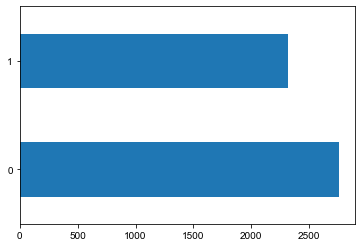

In [6]:
#数据可视化
train['性别'].value_counts().plot(kind = 'barh')
sns.set(font = 'SimHei', font_scale = 1.1)


<AxesSubplot:xlabel='患有糖尿病标识', ylabel='count'>

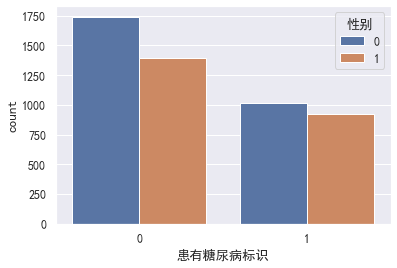

In [7]:
sns.countplot(x = '患有糖尿病标识', hue = '性别', data = train)


<AxesSubplot:xlabel='患有糖尿病标识', ylabel='出生年份'>

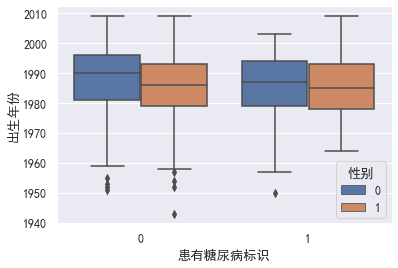

In [8]:
sns.boxplot(y = '出生年份',x = '患有糖尿病标识',hue = '性别',data = train)

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='体重指数'>

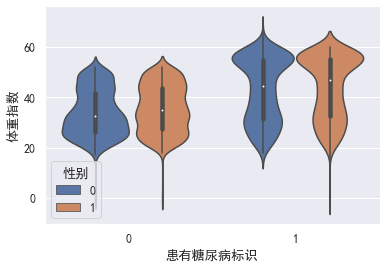

In [9]:
sns.violinplot(y='体重指数',x = '患有糖尿病标识',hue = '性别',data = train)

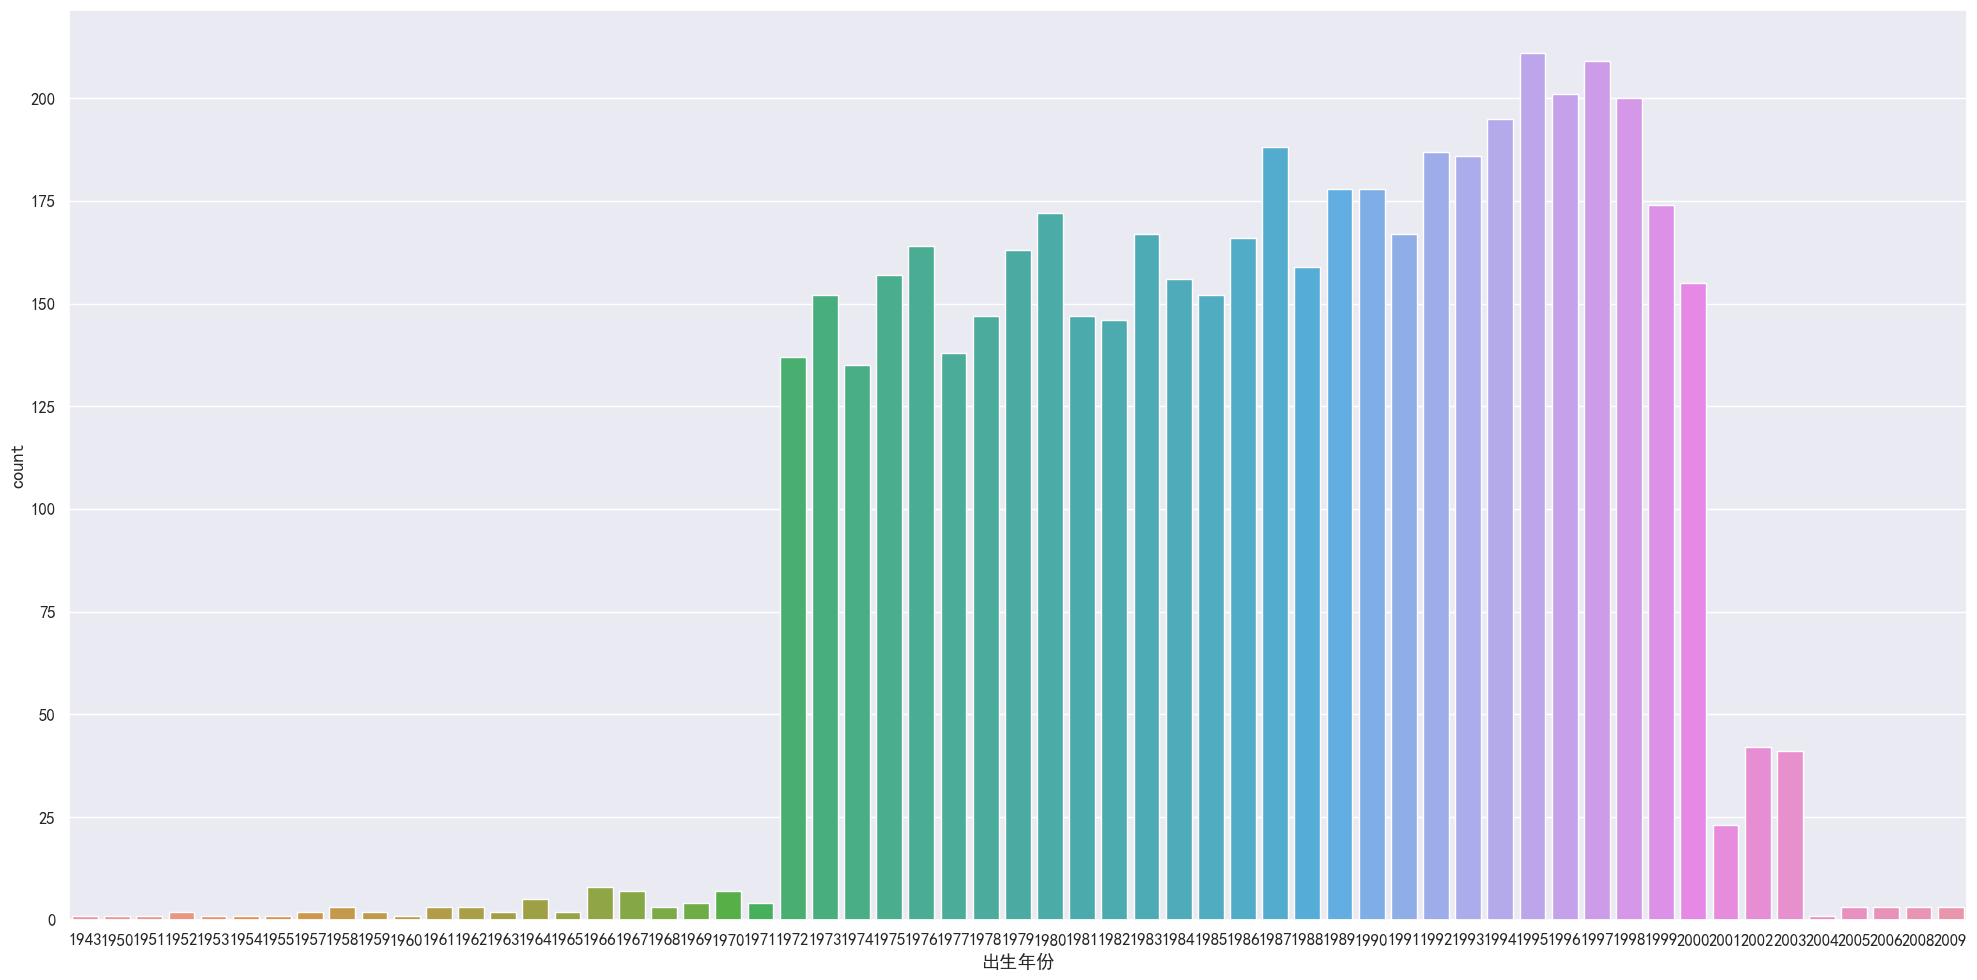

In [10]:
plt.figure(figsize = [20,10], dpi = 100)
sns.countplot(x = '出生年份', data = train)
plt.tight_layout()

In [11]:
#将舒张压特征中的缺失值填充为0
train['舒张压']=train['舒张压'].fillna(0)
test['舒张压']=test['舒张压'].fillna(0)

In [12]:
#----------------特征工程----------------
"""
将出生年份换算成年龄
"""
train['出生年份'] = 2022 - train['出生年份']
test['出生年份'] = 2022 - test['出生年份']

In [13]:
#将年龄分类
"""
>50
<=18
19-30
31-50
"""
def resetAge(input):
    if input <= 18:
        return 0
    elif 19 <= input <= 30:
        return 1
    elif 31 <= input <=50:
        return 2
    elif input >=51:
        return 3

train['rAge'] = train['出生年份'].apply(resetAge)
test['rAge'] = test['出生年份'].apply(resetAge)

In [14]:
"""
人体BMI在18.5-24是正常
低于18.5体重指数过低
24-27是超重
27以上是肥胖
高于32是过度肥胖
"""
def BMI(a):
    if a < 18.5:
        return 0
    elif 18.5 <= a <=24:
        return 1 
    elif 24 < a <= 27:
        return 2
    elif 27< a <=32:
        return 3
    else:
        return 4

train['BMI'] = train['体重指数'].apply(BMI)
test['BMI'] = test['体重指数'].apply(BMI)

In [15]:
#家族史
"""
无记录
叔叔或姑姑
父母有一方
"""
def FHOD(a):
    if a == '无记录':
        return 0
    elif a == '叔叔或者姑姑有一方患有糖尿病' or a == '叔叔或姑姑有一方患有糖尿病':
        return 1
    else:
        return 2
    
train['糖尿病家族史'] = train['糖尿病家族史'].apply(FHOD)
test['糖尿病家族史'] = test['糖尿病家族史'].apply(FHOD)

In [16]:
"""
舒张压范围为60-90
"""
def DBP(a):
    if a == 0:
        return 0
    elif 0< a <60:
        return 1 
    elif 60<= a <=90:
        return 2
    else:
        return 3
    
train['DBP'] = train['舒张压'].apply(DBP)
test['DBP'] = test['舒张压'].apply(DBP)

In [17]:
#删除编号
train = train.drop(['编号'],axis = 1)
test = test.drop(['编号'],axis = 1)

In [18]:
#计算口服耐糖量相对糖尿病家族史进行分组求均值后的差值
train['口服耐糖量测试_diff'] = abs(train['口服耐糖量测试'] - train.groupby('糖尿病家族史'
                                                            ).transform('mean')['口服耐糖量测试'])
test['口服耐糖量测试_diff'] = abs(test['口服耐糖量测试'] - test.groupby('糖尿病家族史'
                                                            ).transform('mean')['口服耐糖量测试'])

In [19]:
train_label=train['患有糖尿病标识']
train=train.drop(['患有糖尿病标识'],axis=1)

In [20]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# 构建模型
model = make_pipeline(
    MinMaxScaler(),
    LogisticRegression()
)
model.fit(train,train_label)
pre_y=model.predict(test)
result=pd.read_csv('C:/Users/15073/Documents/jupyter/糖尿病/提交示例.csv')
result['label']=pre_y
result.to_csv('LR.csv',index=False)


In [21]:
#决策树
from sklearn.tree import DecisionTreeClassifier
# 构建模型
model = DecisionTreeClassifier()
model.fit(train,train_label)
pre_y=model.predict(test)
result=pd.read_csv('C:/Users/15073/Documents/jupyter/糖尿病/提交示例.csv')
result['label']=pre_y
result.to_csv('CART.csv',index=False)

In [22]:
import lightgbm

def select_by_lgb(train_data,train_label,test_data,random_state=2022,metric='auc',
                  num_round=300):
    
    clf=lightgbm
    train_matrix=clf.Dataset(train_data,label=train_label)
    params={
        'boosting_type': 'gbdt', 
        'objective': 'binary',
        'learning_rate': 0.01,
        'metric': metric,
        'seed': 2020,
        'nthread':-1 }
    model=clf.train(params,train_matrix,num_round)
    pre_y=model.predict(test_data)
    return pre_y
#输出预测值 
test_data=select_by_lgb(train,train_label,test)
pre_y=pd.DataFrame(test_data)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('C:/Users/15073/Documents/jupyter/糖尿病/提交示例.csv')
result['label']=pre_y['label']
result.to_csv('lgb.csv',index=False)

[LightGBM] [Info] Number of positive: 1936, number of negative: 3134
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1322
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381854 -> initscore=-0.481686
[LightGBM] [Info] Start training from score -0.481686


In [23]:
import lightgbm
from sklearn.model_selection import KFold
def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=5,
                  metric='auc',num_round=10000,early_stopping_rounds=100):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold=0
    result=[]
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        clf=lightgbm
        train_matrix=clf.Dataset(train_x,label=train_y)
        test_matrix=clf.Dataset(test_x,label=test_y)
        params={
                     'boosting_type': 'gbdt', 
                    'objective': 'binary',
                    'learning_rate': 0.1,
                    'metric': metric,
                    'seed': 2020,
                    'nthread':-1 }
        model=clf.train(params,train_matrix,num_round,valid_sets=test_matrix,
                        early_stopping_rounds=early_stopping_rounds)
        pre_y=model.predict(test_data)
        result.append(pre_y)
        fold+=1
        return result
    
test_data=select_by_lgb(train,train_label,test)
pre_y=pd.DataFrame(test_data).T
pre_y['averge']=pre_y[[i for i in range(5)]].mean(axis=1)
pre_y['label']=pre_y['averge'].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('C:/Users/15073/Documents/jupyter/糖尿病/提交示例.csv')
result['label']=pre_y['label']
result.to_csv('lgb.csv',index=False)

D:\jupyer\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 1547, number of negative: 2509
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 4056, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381410 -> initscore=-0.483567
[LightGBM] [Info] Start training from score -0.483567
[1]	valid_0's auc: 0.986377
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.987881
[3]	valid_0's auc: 0.987928
[4]	valid_0's auc: 0.987825
[5]	valid_0's auc: 0.987726
[6]	valid_0's auc: 0.987757
[7]	valid_0's auc: 0.986651
[8]	valid_0's auc: 0.987866
[9]	valid_0's auc: 0.987035
[10]	valid_0's auc: 0.989386
[11]	valid_0's auc: 0.989396
[12]	valid_0's auc: 0.989456
[13]	valid_0's auc: 0.990746
[14]	valid_0

KeyError: '[1, 2, 3, 4] not in index'